# K Nearest Neighbors Projekt - Lösung

Willkommen zum KNN Projekt! Dies wird ein einfaches Prjekt werden, das der Lektion ähnlich ist. Der Unterschied besteht darin, dass wir einen neuen Datensatz verwenden. Schau dir die Aufgabenstellung an und schreibe den Code in die Zellen.

## Libraries importieren

**Importiere Pandas, Seaborn und die üblichen Libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten

**Lese die CSV-Datei "KNN_Project_Data" in einen DataFrame ein.**

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Checke den Head es DataFrame.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## EDA

Da die Daten künstlich erzeugt wurden nutzen wir nur ein großes Pairplot mit Seaborn. 

**Nutze Seaborn um ein Pairplot für den DataFrame zu erstellen. Für Hue verwenden wir die Zielgruppe (en. target class).**

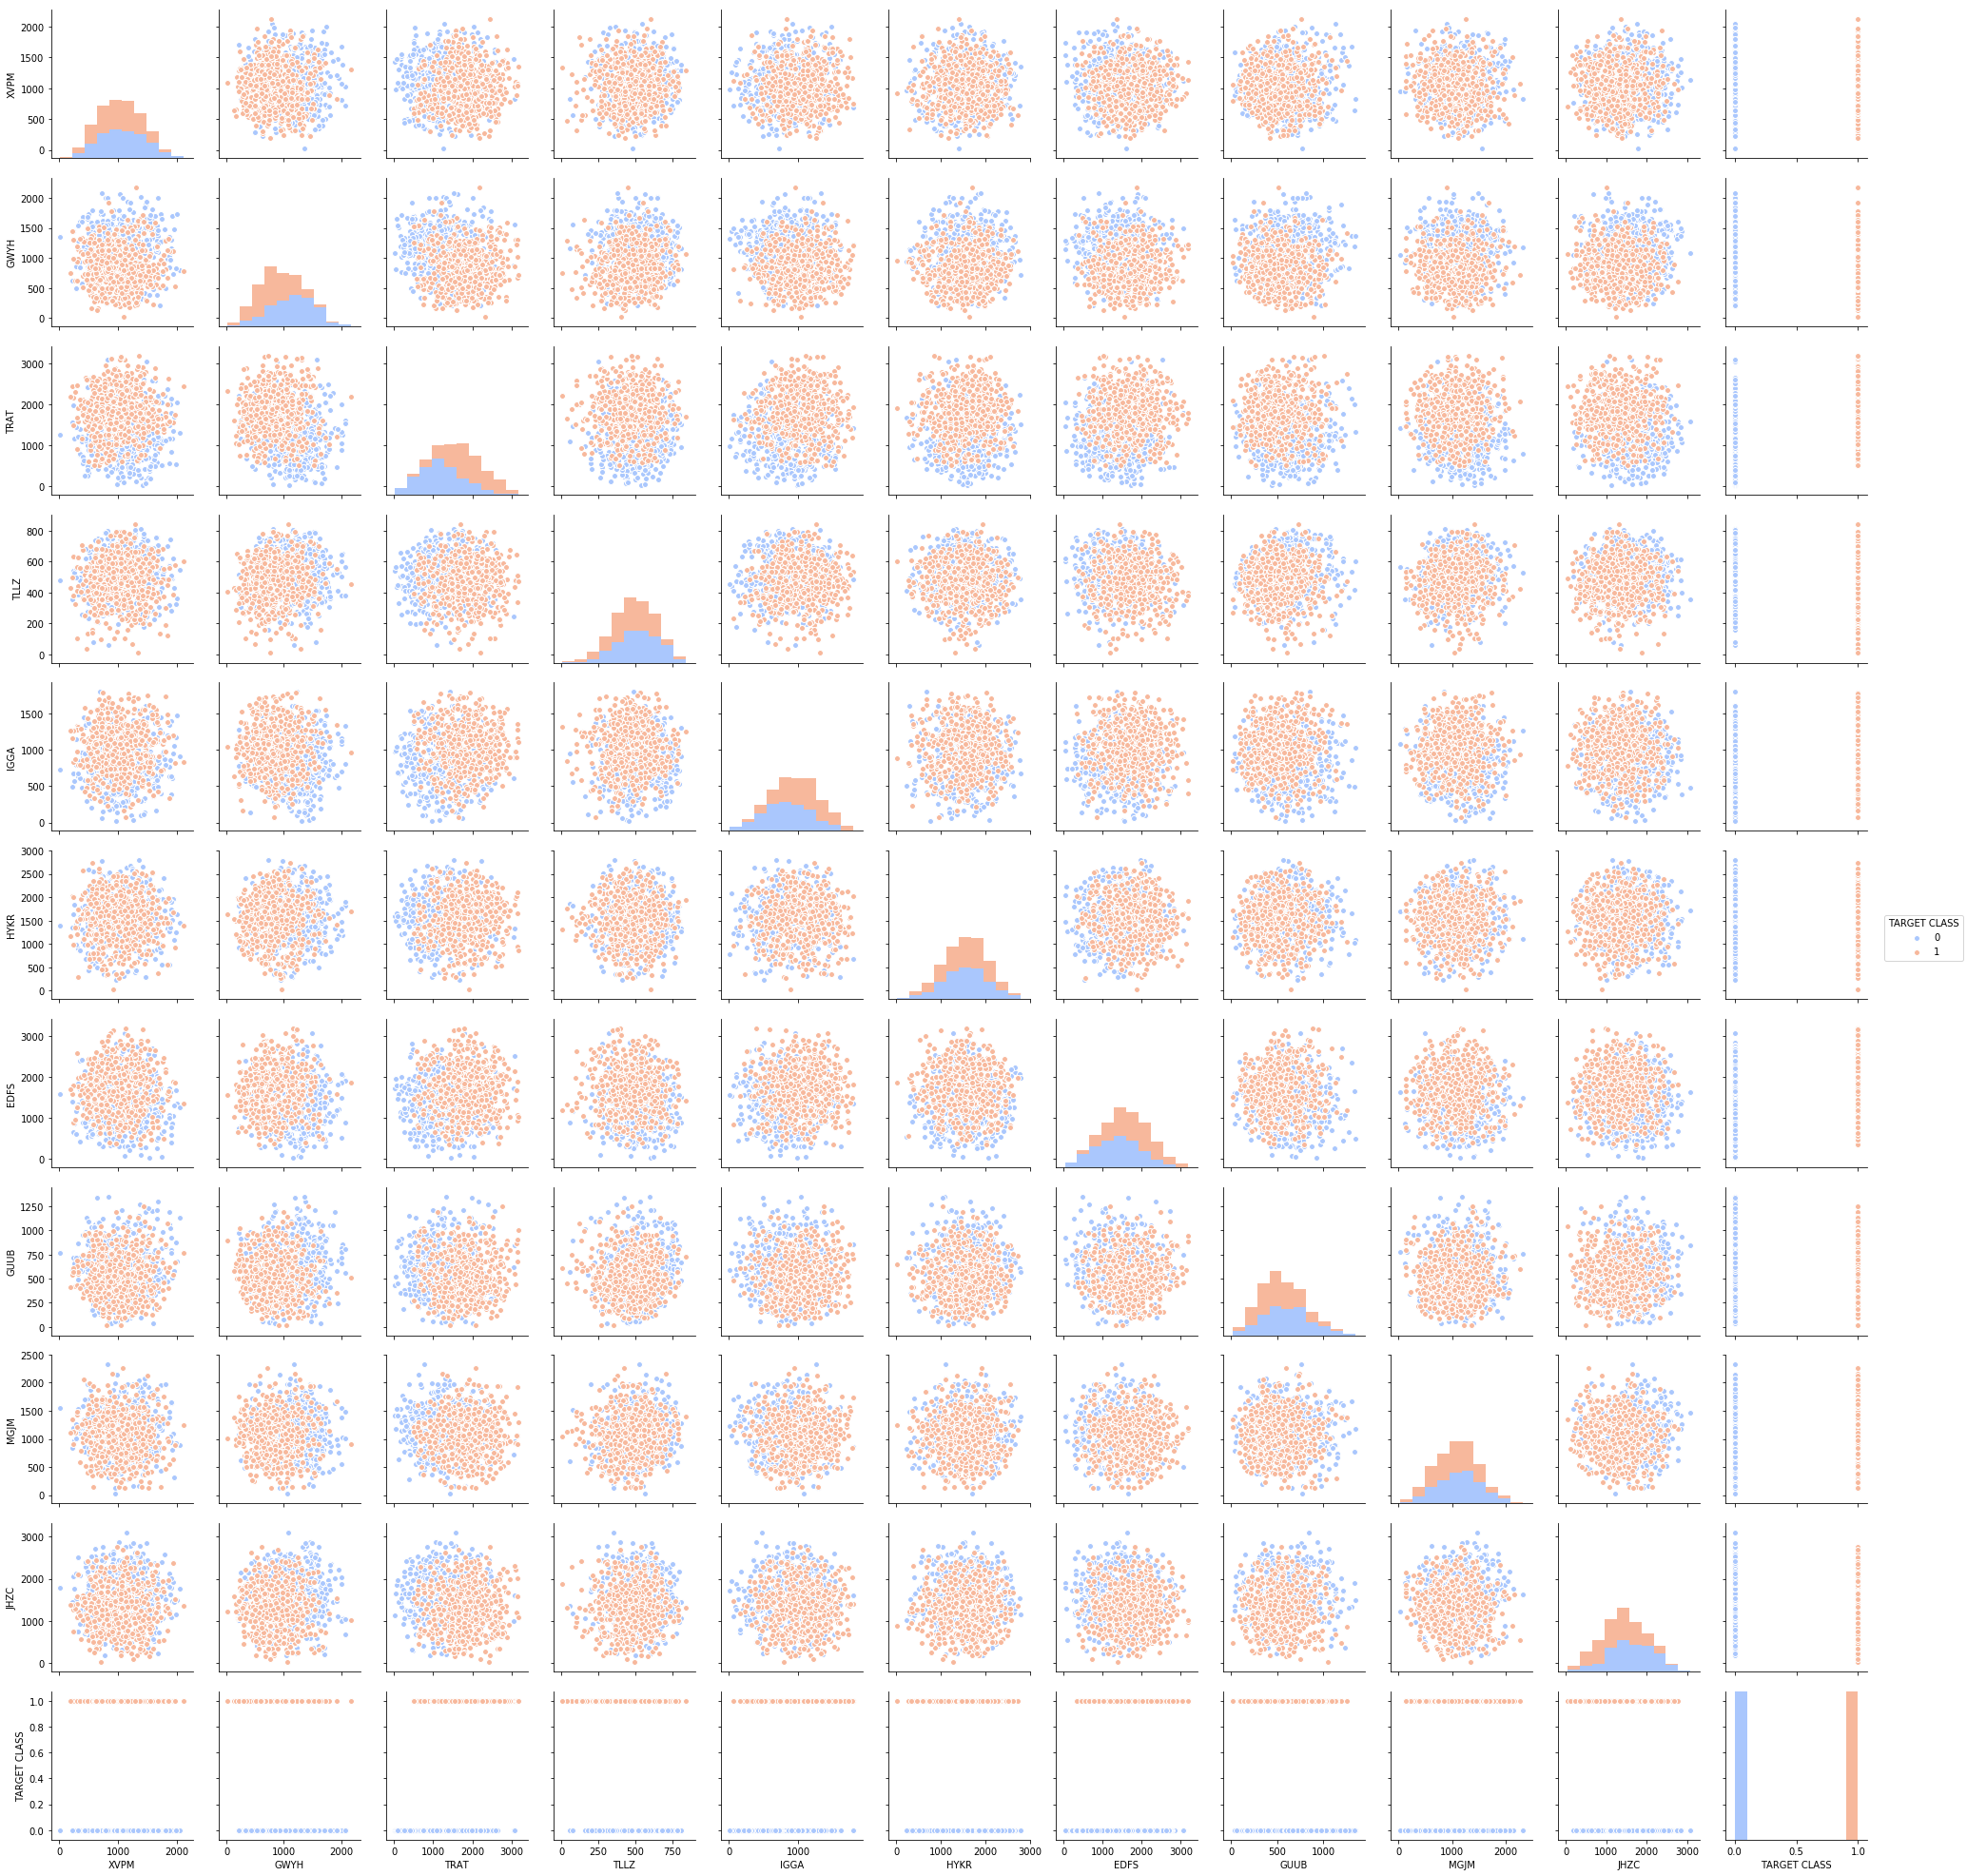

In [4]:
# Das wird ein wirklich großes Plot
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

## Variablen standardisieren
**Importiere StandardScaler von SciKit Learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

**Erstelle ein StandardScaler() Objekt namens "scaler".**

In [6]:
scaler = StandardScaler()

**Wende den Scaler auf die Eigenschaften an.**

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Nutze .transform(), um die Eigenschaften in eine skalierte Version umzuwandeln.**

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Konvertiere die skalierten Eigenschaften in einen DataFrame und sieh dir dessen Head an.**

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

**Nutze train_test_split um die Daten in Trainings- und Testset aufzuteilen.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## KNN anwenden

**Importiere KNeighborsClassifier aus SciKit Learn.**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

**Erstelle ein KNN Modell mit n_neighbors=1.**

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitte dieses Modell zum Trainingsset.**

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Vorghersagen und Auswertung

Lasst uns nun unser Modell auswerten!

**Nutze die predict Methode um die Werte unter Verwendung deines KNN Modells für X_test vorherzusagen.**

In [27]:
pred = knn.predict(X_test)

**Erstelle eine Confusion Matrix und den Classification Report.**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,pred))

[[113  41]
 [ 41 105]]


In [30]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.73      0.73       154
          1       0.72      0.72      0.72       146

avg / total       0.73      0.73      0.73       300



## Den K Wert wählen

Schreite damit fort die Elbow-Methode zu verwenden um einen guten K Wert zu wählen!

**Erstelle eine for-Schleife, die verschiedene KNN Modelle mit verschiedenen K Werten trainiert. Dann notiere die die Error Rate für jedes dieser Modelle in einer Liste.**

*Hinweis: Greife auf die Lektion zurück, falls dich dieser Schritt verwirrt.*

In [31]:
error_rate = []

# Könnte etwas Zeit in Anspruch nehmen
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Erstelle nun das folgende Diagramm mit den Infos aus deiner Schleife.**

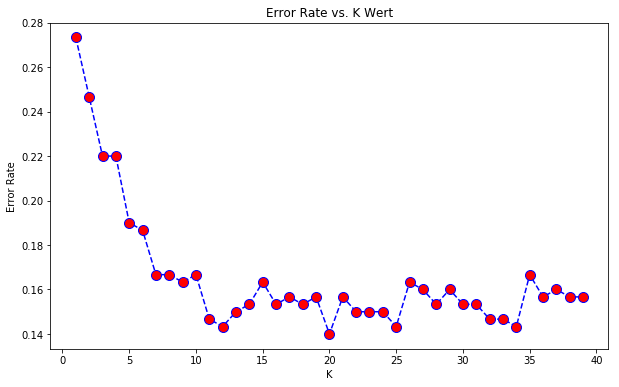

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Wert')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Erneut trainieren mit neuem K Wert

**Trainiere dein Modell erneut mit einem K Wert deiner Wahl. Erstelle dann erneut Classification Report und Confusion Matrix.**

In [33]:
# Mit K=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Mit K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Mit K=24


[[131  23]
 [ 22 124]]


             precision    recall  f1-score   support

          0       0.86      0.85      0.85       154
          1       0.84      0.85      0.85       146

avg / total       0.85      0.85      0.85       300



# Gut gemacht!